In [1]:
import pandas as pd

# Load the dataset
file_path = 'C:/Shiva Files/Shiva SSD/Shiva/MSBA Cohort/Semester 2/Predictive Analytics/Conagra Project/Data_merge/Meat_substitue/Editings_merged/Final_Merged_Cleaned.xlsx'
data2 = pd.read_excel(file_path)

print(data2.columns)

Index(['Geography', 'Time', 'Date', 'Month', 'Year', 'Product', 'UPC 13 digit',
       'Maufacturer Name', 'Brand Franchise Name', 'Brand Name', 'Unit Sales',
       'Unit Sales No Merch', 'Unit Sales Any Merch',
       'Unit Sales Price Reductions Only', 'Unit Sales Feature Only',
       'Unit Sales Display Only', 'Unit Sales Special Pack Only',
       'Unit Sales Feature and Display', 'Volume Sales',
       'Volume Sales No Merch', 'Volume Sales Any Merch',
       'Volume Sales Price Reductions Only', 'Volume Sales Feature Only',
       'Volume Sales Display Only', 'Volume Sales Special Pack Only',
       'Volume Sales Feature and Display', 'Dollar Sales',
       'Dollar Sales No Merch', 'Dollar Sales Any Merch',
       'Dollar Sales Price Reductions Only', 'Dollar Sales Feature Only',
       'Dollar Sales Display Only', 'Dollar Sales Special Pack Only',
       'Dollar Sales Feature and Display', 'Price per Unit',
       'Price per Unit No Merch', 'Price per Unit Any Merch',
       '

## Top Products Sold in USD

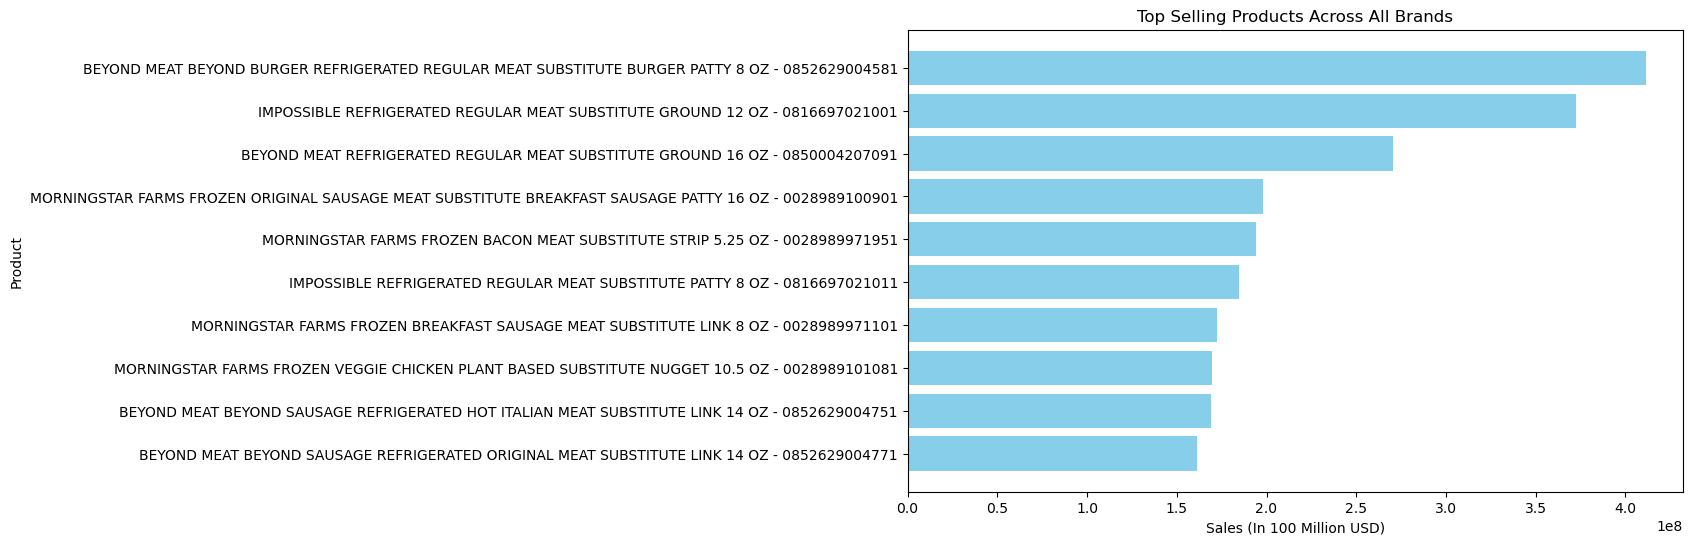

In [24]:
import matplotlib.pyplot as plt
# Group by Product and sum the Dollar Sales
product_sales = data2.groupby('Product')['Dollar Sales'].sum().reset_index()

# Sort by Dollar Sales in descending order
product_sales = product_sales.sort_values(by='Dollar Sales', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(product_sales['Product'][:10], product_sales['Dollar Sales'][:10], color='skyblue')
plt.xlabel('Sales (In 100 Million USD)')
plt.ylabel('Product')
plt.title('Top Selling Products Across All Brands')
plt.gca().invert_yaxis()  # Invert y-axis to display the product with the highest sales on top
plt.show()

## Top Products Types Sold in USD

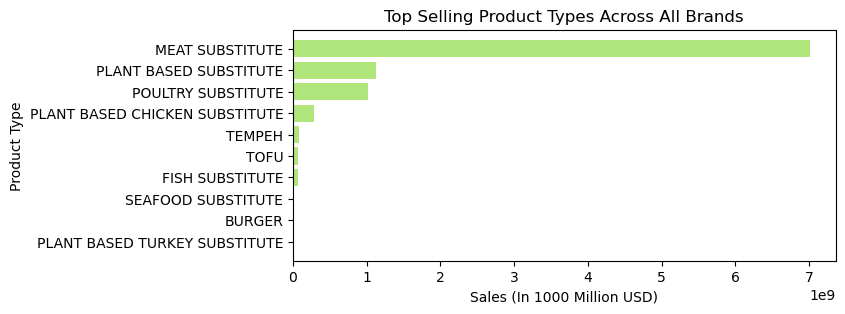

In [43]:
import matplotlib.pyplot as plt
# Group by Product and sum the Dollar Sales
product_type_sales = data2.groupby('Product Type')['Dollar Sales'].sum().reset_index()

# Sort by Dollar Sales in descending order
product_type_sales = product_type_sales.sort_values(by='Dollar Sales', ascending=False)

# Plotting
plt.figure(figsize=(7, 3))
plt.barh(product_type_sales['Product Type'][:10], product_type_sales['Dollar Sales'][:10], color='#B0E57C')
plt.xlabel('Sales (In 1000 Million USD)')
plt.ylabel('Product Type')
plt.title('Top Selling Product Types Across All Brands')
plt.gca().invert_yaxis()  # Invert y-axis to display the product with the highest sales on top
plt.show()

## Top Falvors/Scent Sold in USD

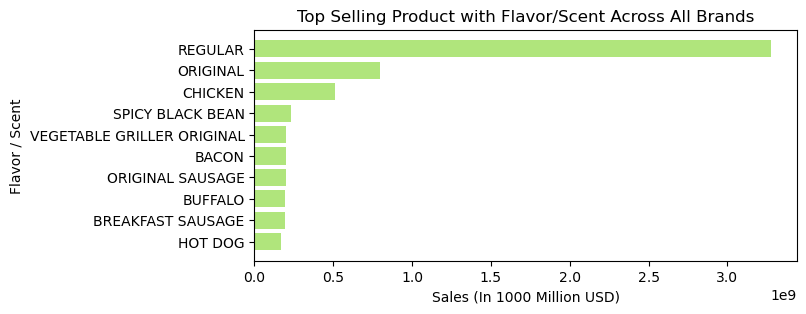

In [42]:
# Group by Product and sum the Dollar Sales
flavor_sales = data2.groupby('Flavor / Scent')['Dollar Sales'].sum().reset_index()

# Sort by Dollar Sales in descending order
flavor_sales = flavor_sales.sort_values(by='Dollar Sales', ascending=False)

# Plotting
plt.figure(figsize=(7, 3))
plt.barh(flavor_sales['Flavor / Scent'][:10], flavor_sales['Dollar Sales'][:10], color='#B0E57C')
plt.xlabel('Sales (In 1000 Million USD)')
plt.ylabel('Flavor / Scent')
plt.title('Top Selling Product with Flavor/Scent Across All Brands')
plt.gca().invert_yaxis()  # Invert y-axis to display the product with the highest sales on top
plt.show()

## Top Food Forms in USD

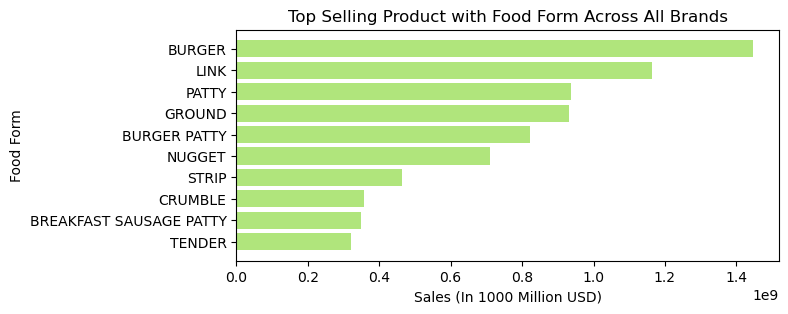

In [45]:
# Group by Product and sum the Dollar Sales
form_sales = data2.groupby('Form')['Dollar Sales'].sum().reset_index()

# Sort by Dollar Sales in descending order
form_sales = form_sales.sort_values(by='Dollar Sales', ascending=False)

# Plotting
plt.figure(figsize=(7, 3))
plt.barh(form_sales['Form'][:10], form_sales['Dollar Sales'][:10], color='#B0E57C')
plt.xlabel('Sales (In 1000 Million USD)')
plt.ylabel('Food Form')
plt.title('Top Selling Product with Food Form Across All Brands')
plt.gca().invert_yaxis()  # Invert y-axis to display the product with the highest sales on top
plt.show()

## Top Products Sold geography-wise

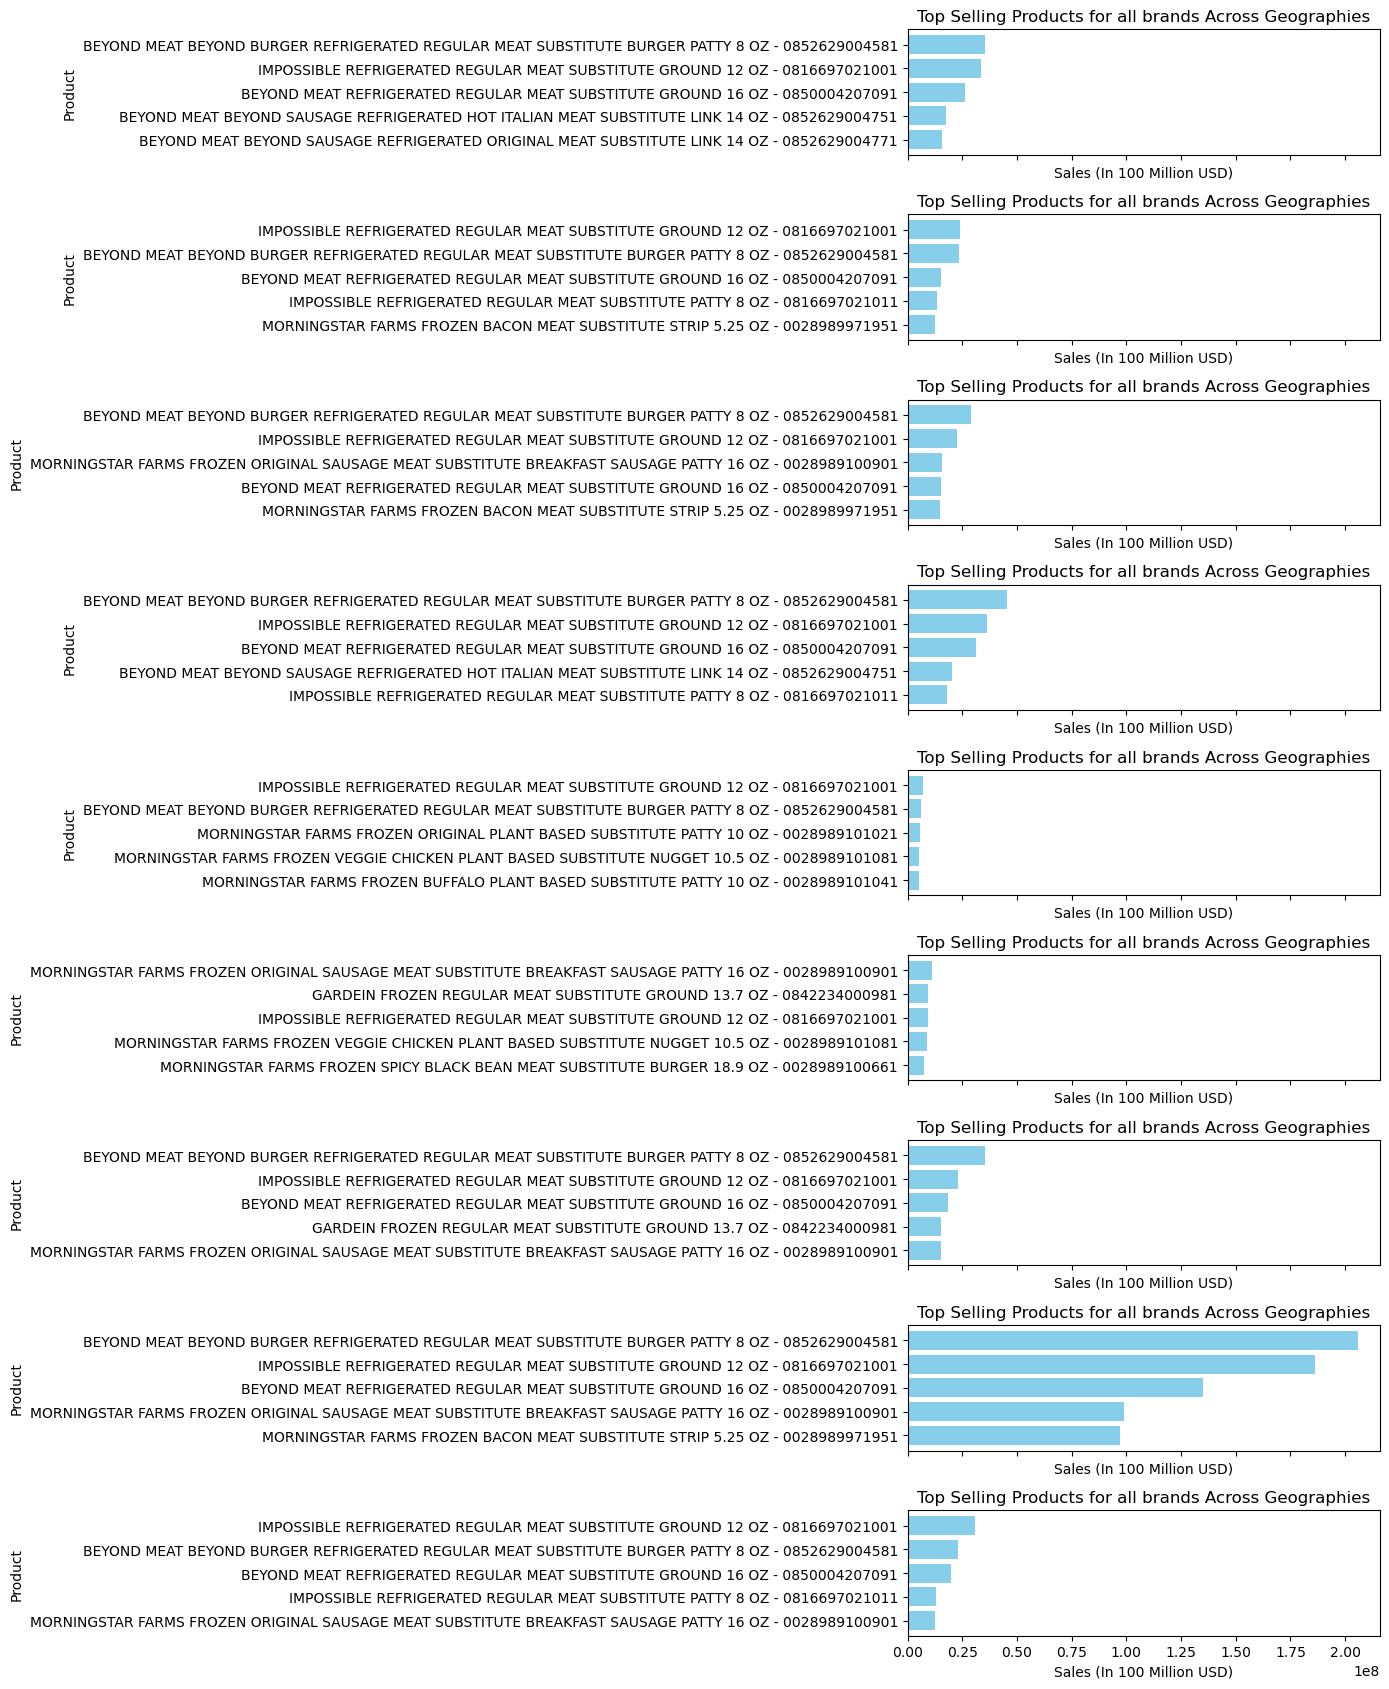

In [48]:
# Group by Product, Geography, and sum the Dollar Sales
product_sales_geography = data2.groupby(['Product', 'Geography'])['Dollar Sales'].sum().reset_index()

# Find top products sold in each geography
top_products_geography = product_sales_geography.groupby('Geography').apply(lambda x: x.nlargest(5, 'Dollar Sales')).reset_index(drop=True)

# Plotting
fig, axes = plt.subplots(nrows=len(top_products_geography['Geography'].unique()), figsize=(14, 17), sharex=True)
plt.subplots_adjust(hspace=0.5)

for ax, (geography, data) in zip(axes, top_products_geography.groupby('Geography')):
    ax.barh(data['Product'], data['Dollar Sales'], color='skyblue')
    ax.set_title("Top Selling Products for all brands Across Geographies")
    ax.set_xlabel('Sales (In 100 Million USD)')
    ax.set_ylabel('Product')
    ax.invert_yaxis()  # Invert y-axis to display the product with the highest sales on top

plt.tight_layout()
plt.show()

## ACV Weighted Distribution Across Geographies

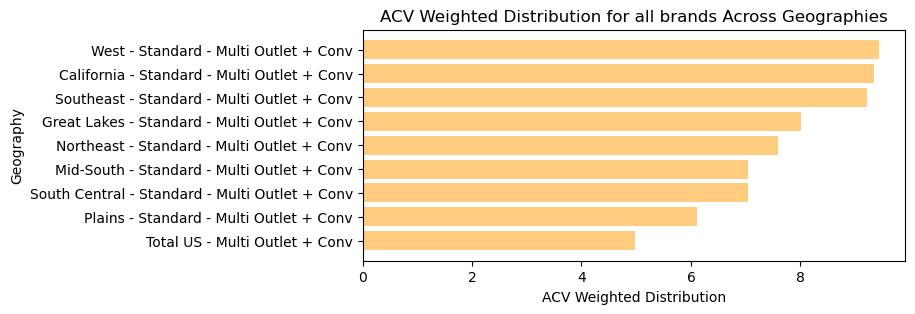

In [47]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by Geography and calculate the mean ACV Weighted Distribution for each geography
acv_distribution = data2.groupby('Geography')['ACV Weighted Distribution'].mean().reset_index()

# Sort the dataframe by ACV Weighted Distribution in descending order
acv_distribution = acv_distribution.sort_values(by='ACV Weighted Distribution', ascending=False)

# Plotting
plt.figure(figsize=(7, 3))
plt.barh(acv_distribution['Geography'], acv_distribution['ACV Weighted Distribution'], color='#FFCC80')
plt.xlabel('ACV Weighted Distribution')
plt.ylabel('Geography')
plt.title('ACV Weighted Distribution for all brands Across Geographies')
plt.gca().invert_yaxis()  # Invert y-axis to display the geography with the highest ACV on top
plt.show()


## Top Brand Franchises

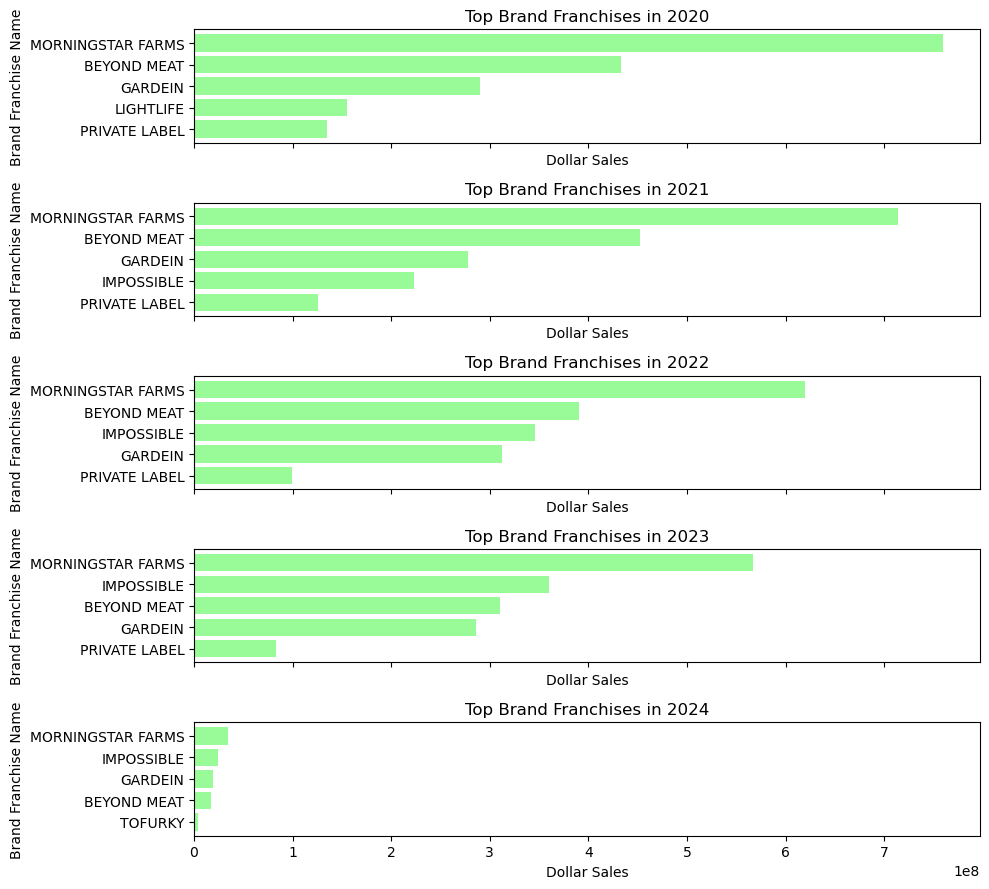

In [23]:
# Group by Brand Franchise Name and Year and sum the Dollar Sales
brand_sales_yearwise = data2.groupby(['Brand Franchise Name', 'Year'])['Dollar Sales'].sum().reset_index()

# Find top Brand Franchise Names year-wise
top_brands_yearwise = brand_sales_yearwise.groupby('Year').apply(lambda x: x.nlargest(5, 'Dollar Sales')).reset_index(drop=True)

# Plotting
fig, axes = plt.subplots(nrows=len(top_brands_yearwise['Year'].unique()), figsize=(10, 9), sharex=True)
plt.subplots_adjust(hspace=0.5)

for ax, (year, data) in zip(axes, top_brands_yearwise.groupby('Year')):
    ax.barh(data['Brand Franchise Name'], data['Dollar Sales'], color='#98FB98')
    ax.set_title(f"Top Brand Franchises in {year}")
    ax.set_xlabel('Dollar Sales')
    ax.set_ylabel('Brand Franchise Name')
    ax.invert_yaxis()  # Invert y-axis to display the brand with the highest sales on top

plt.tight_layout()
plt.show()
